<a href="https://colab.research.google.com/github/Epsoto7/Proyecto_flores/blob/main/An%C3%A1lisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

# Esto asegura que las figuras de Matplotlib se muestren en línea en Jupyter Notebook/Google Colab
%matplotlib inline

In [ ]:
# El dataset viene por defvalidault con las divisiones de train,valid, test
# Se cargan los conjuntos en formato en "bruto"
import tensorflow_datasets as tfds
(train_ds, validation_ds, test_ds), metadata = tfds.load(
    name="oxford_flowers102",
    split=['train', 'validation', 'test'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.WBXVGR_2.1.1/oxford_flowers102-train.tfrecord…

Generating test examples...:   0%|          | 0/6149 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.WBXVGR_2.1.1/oxford_flowers102-test.tfrecord*…

Generating validation examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.WBXVGR_2.1.1/oxford_flowers102-validation.tfr…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


In [ ]:
#Se obtienen algunos datos que pueden ser de interés
print(metadata)

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

In [ ]:
# Obtener el número de ejemplos en cada conjunto desde la información del dataset
num_train = metadata.splits['train'].num_examples
num_valid = metadata.splits['validation'].num_examples
num_test = metadata.splits['test'].num_examples

print(f'Hay {num_train:,} imágenes en el conjunto de entrenamiento')
print(f'Hay {num_valid:,} imágenes en el conjunto de validación')
print(f'Hay {num_test:,} imágenes en el conjunto de prueba')

# Obtener el número de clases en el dataset desde la información del dataset
num_clases = metadata.features['label'].num_classes
print(f'Hay {num_clases:,} clases en el dataset')


Hay 1,020 imágenes en el conjunto de entrenamiento
Hay 1,020 imágenes en el conjunto de validación
Hay 6,149 imágenes en el conjunto de prueba
Hay 102 clases en el dataset


In [ ]:
#Ver la etiqueta y tamaño de 3 imagenes
for image, label in train_ds.take(3):
    print('image in the training set have:\n\u2022 dtype:', image.dtype, '\n\u2022 shape:', image.shape, '\n\u2022 label:', label.numpy())

image in the training set have:
• dtype: <dtype: 'uint8'> 
• shape: (500, 667, 3) 
• label: 72
image in the training set have:
• dtype: <dtype: 'uint8'> 
• shape: (500, 666, 3) 
• label: 84
image in the training set have:
• dtype: <dtype: 'uint8'> 
• shape: (670, 500, 3) 
• label: 70


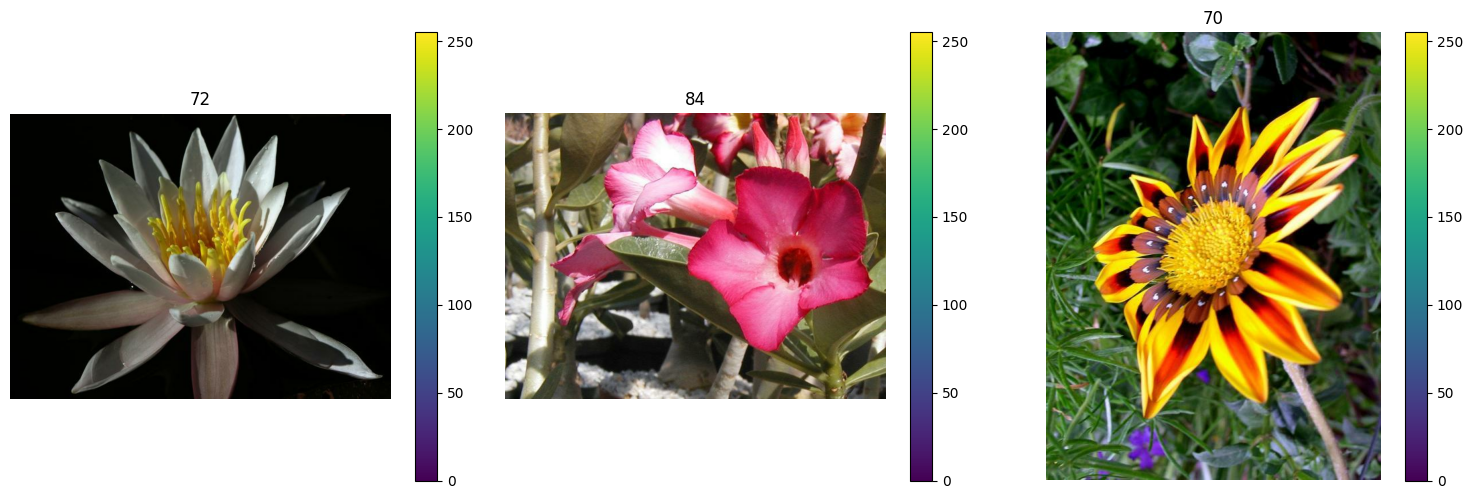

In [ ]:
import matplotlib.pyplot as plt

# Tomar las primeras 3 imágenes del conjunto de entrenamiento
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Una fila de 3 subplots, tamaño de la figura (ancho, alto)

for i, (imagen, etiqueta) in enumerate(train_ds.take(3)):
    imagen = imagen.numpy().squeeze()
    etiqueta = etiqueta.numpy()

    # Mostrar cada imagen en su respectivo subplot
    axs[i].imshow(imagen, cmap=plt.cm.binary)
    axs[i].set_title(str(etiqueta))
    axs[i].axis('off')  # Desactivar los ejes para una mejor visualización
    fig.colorbar(axs[i].imshow(imagen), ax=axs[i])
    plt.grid(False)
plt.tight_layout()  # Ajustar el diseño de los subplots para evitar superposiciones
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#convertir las etiquetas de numero a su correspondiente nombre, estos valores fueron encontrados en un archivo json
import json
with open('/content/drive/My Drive/Colab Notebooks/Proyecto samsung/etiquetas_flores.json', 'r') as f:
    nombre_clases = json.load(f)

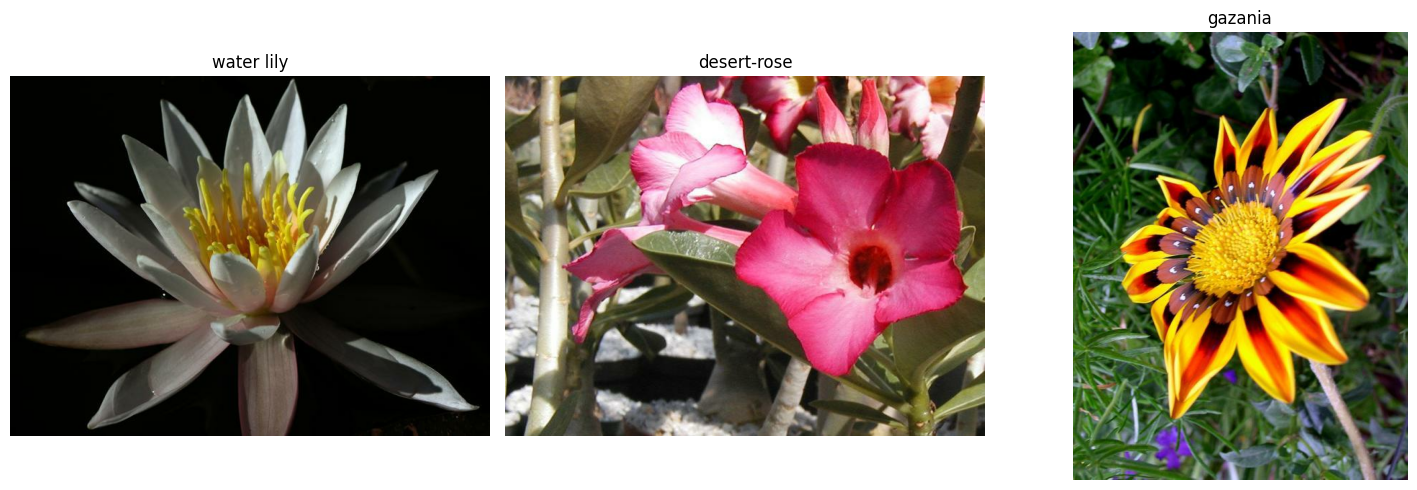

In [ ]:
# Tomar las primeras 3 imágenes del conjunto de entrenamiento para visualizar las etiquetas
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Una fila de 3 subplots, tamaño de la figura (ancho, alto)

for i, (imagen, etiqueta) in enumerate(train_ds.take(3)):
    imagen = imagen.numpy().squeeze()
    etiqueta = etiqueta.numpy()

    # Mostrar cada imagen en su respectivo subplot
    axs[i].imshow(imagen, cmap=plt.cm.binary)
    axs[i].set_title(nombre_clases[str(etiqueta)])
    axs[i].axis('off')  # Desactivar los ejes para una mejor visualización

plt.tight_layout()  # Ajustar el diseño de los subplots para evitar superposiciones
plt.show()

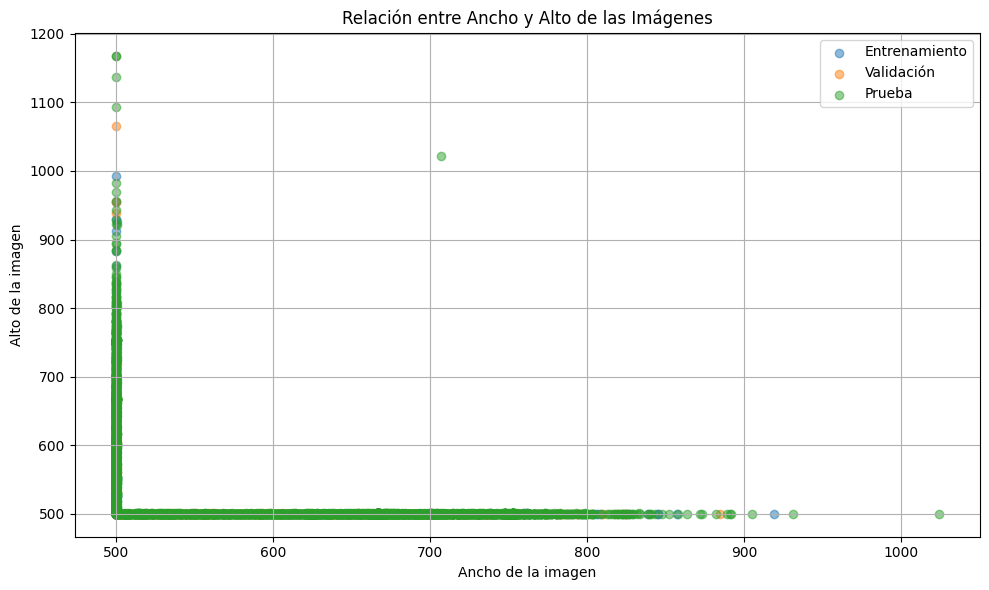

In [ ]:
# Función para obtener los tamaños de las imágenes en un conjunto de datos
def get_image_sizes(dataset):
    sizes = []
    for image, _ in dataset:
        sizes.append(np.array(image).shape[:2])  # Obtiene solo alto y ancho
    return sizes

# Obtener los tamaños de las imágenes para cada conjunto de datos
train_sizes = get_image_sizes(train_ds)
val_sizes = get_image_sizes(validation_ds)
test_sizes = get_image_sizes(test_ds)

# Convertir listas de tamaños a arrays numpy
train_sizes = np.array(train_sizes)
val_sizes = np.array(val_sizes)
test_sizes = np.array(test_sizes)

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(train_sizes[:, 1], train_sizes[:, 0], label='Entrenamiento', alpha=0.5)
plt.scatter(val_sizes[:, 1], val_sizes[:, 0], label='Validación', alpha=0.5)
plt.scatter(test_sizes[:, 1], test_sizes[:, 0], label='Prueba', alpha=0.5)
plt.xlabel('Ancho de la imagen')
plt.ylabel('Alto de la imagen')
plt.title('Relación entre Ancho y Alto de las Imágenes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Crear dataframes para cada conjunto de datos (tamaños de las imagenes)
import pandas as pd

train_df = pd.DataFrame(train_sizes, columns=['Height', 'Width'])
val_df = pd.DataFrame(val_sizes, columns=['Height', 'Width'])
test_df = pd.DataFrame(test_sizes, columns=['Height', 'Width'])

# Añadir una columna para identificar el conjunto de datos
train_df['Dataset'] = 'Entrenamiento'
val_df['Dataset'] = 'Validación'
test_df['Dataset'] = 'Prueba'

# Concatenar los dataframes
full_df = pd.concat([train_df, val_df, test_df], ignore_index=True)
full_df.describe()

,Height,Width
count,8189.000000,8189.000000
mean,534.352058,630.160581
std,75.453540,95.988254
min,500.000000,500.000000
25%,500.000000,501.000000
50%,500.000000,667.000000
75%,501.000000,699.000000
max,1168.000000,1024.000000


**Las imágenes en el conjunto de datos tienen dimensiones que oscilan entre un mínimo de 500 píxeles tanto en altura como en ancho, y un máximo que varía de 1024 a 1168 píxeles. Los valores medios indican que las imágenes tienen aproximadamente 534 píxeles de alto y 630 píxeles de ancho. Esto sugiere que las imágenes del conjunto de datos tienen dimensiones relativamente uniformes y adecuadas, sin diferencias drásticas en sus tamaños.**

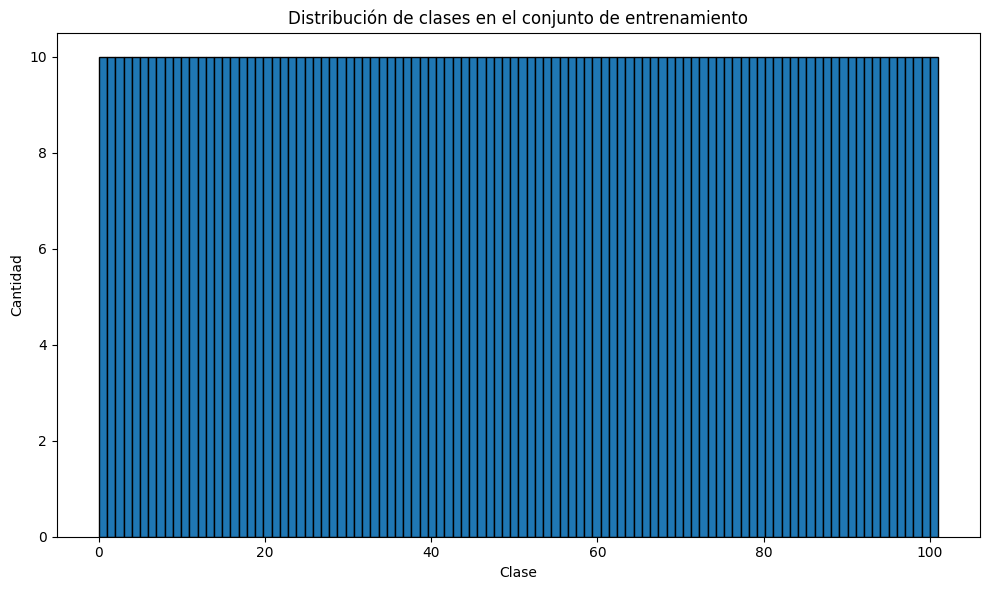

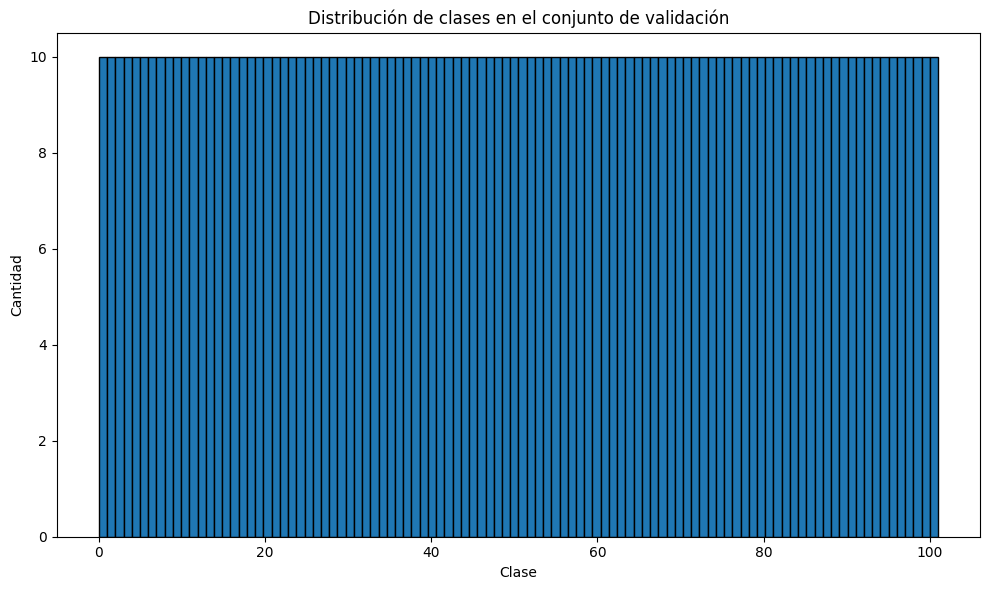

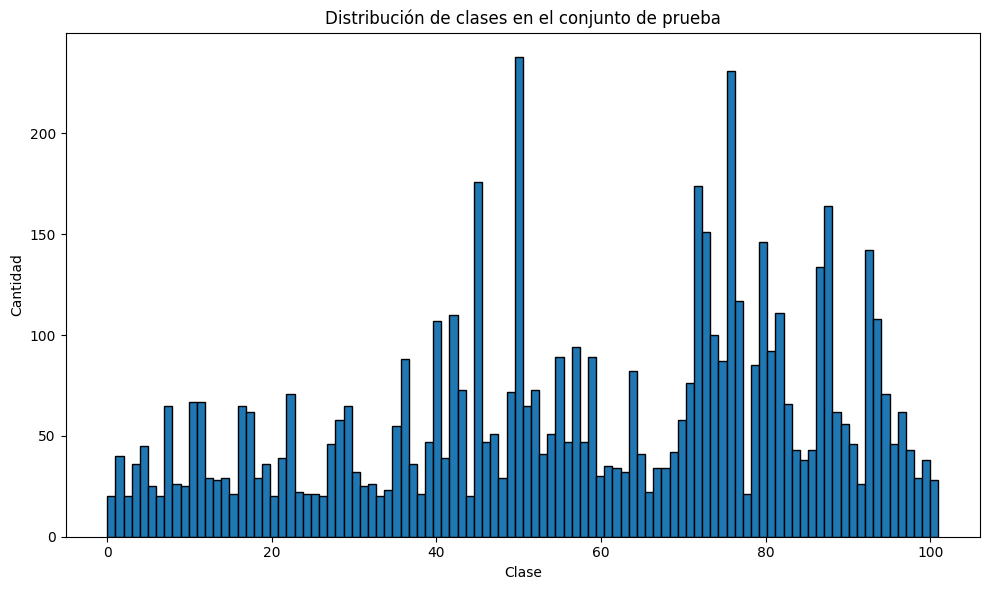

In [ ]:
# Función para obtener las clases de las imágenes en un conjunto de datos
#"No sé si agregar esto"
def get_image_classes(dataset):
    classes = []
    for _, label in dataset:
        classes.append(label.numpy())
    return classes

# Obtener las clases de las imágenes para cada conjunto de datos
train_classes = get_image_classes(train_ds)
val_classes = get_image_classes(validation_ds)
test_classes = get_image_classes(test_ds)

# Crear los histogramas de distribución de clases
def plot_class_distribution(classes, dataset_name):
    plt.figure(figsize=(10, 6))
    plt.hist(classes, bins=metadata.features['label'].num_classes, edgecolor='black')
    plt.xlabel('Clase')
    plt.ylabel('Cantidad')
    plt.title(f'Distribución de clases en el conjunto {dataset_name}')
    plt.tight_layout()
    plt.show()

# Crear los gráficos para cada conjunto de datos
plot_class_distribution(train_classes, 'de entrenamiento')
plot_class_distribution(val_classes, 'de validación')
plot_class_distribution(test_classes, 'de prueba')